In [1]:
using PlotlyJS, ClusterAnalysis, StatsBase, DataFrames, CSV, LinearAlgebra

In [2]:
filename = "flute_syrinx_1_f0"
#filename = "violin_canonD_4_f0"
PATH = "./fpt/data/output/scores/" * filename * ".csv"

"./fpt/data/output/scores/flute_syrinx_1_f0.csv"

In [3]:
# Similary distance resonances (cos d_{jk})
function resonanceSimilarity(df)

    formatted_d = map(x -> replace(x, 'j' => "im", '(' => "", ')' => ""), df.d)
    formatted_w = map(x -> replace(x, 'j' => "im", '(' => "", ')' => ""), df.w)

    d = map(x -> parse(ComplexF64, x), formatted_d)
    w = map(x -> parse(ComplexF64, x), formatted_w)

    djdk = map((x,y) -> x.*y, d[1:end-1], d[2:end])
    diff_wjwk = diff(w)


    dj_absPow = abs.(d[1:end-1]).^2
    dk_absPow = abs.(d[2:end]).^2

    gj = df.decay[1:end-1]
    gk = df.decay[2:end]

    numerator = real(djdk./diff_wjwk)

    similarity = numerator ./ (dj_absPow./gj).*(dk_absPow./gk)

    # last element has 0 similarity with first one
    push!(similarity,0)

    similarity
end

resonanceSimilarity (generic function with 1 method)

In [4]:
df = DataFrame(CSV.File(PATH))

df[!,:similarity] = resonanceSimilarity(df)

1149-element Vector{Float64}:
 -7.767482937362499e-8
  1.7207089760603916e-11
  7.769974310287283e-11
  9.219233079004994e-9
  9.001744873270632e-7
 -7.056163652930817e-8
 -1.9427940149498082e-7
  1.958754581032528e-7
 -0.0005140055498097801
  8.67763992981967e-9
  ⋮
  6.431934492448951e-9
 -2.6962063219808096e-9
  1.164899212431871e-10
 -2.7917112179090137e-9
 -2.912698369036298e-16
 -1.3817868431257203e-10
 -4.4952216756227964e-13
  7.517012570970751e-11
  0.0

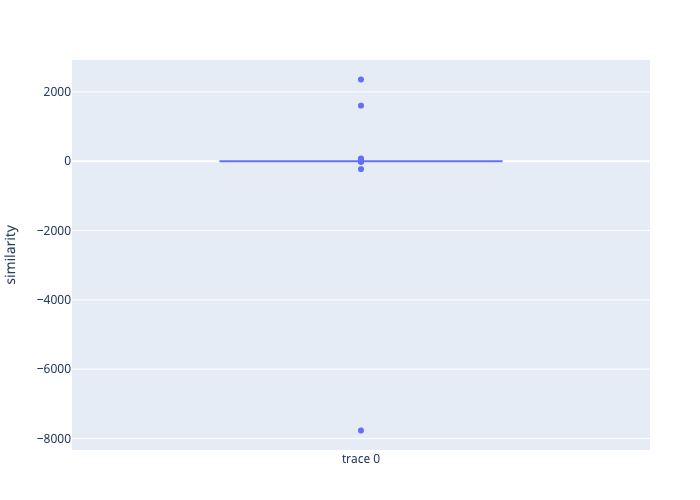

In [5]:
using PlotlyJS, CSV, DataFrames

plot(df, y=:similarity, kind="box")